In [1]:
import pandas as pd
# import spacy
# spacy.cli.download("en_core_web_lg")
from sklearn.model_selection import train_test_split
import numpy as np
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle
# Plot
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('consumer_complaints.csv')

df['complain_length'] = df['consumer_complaint_narrative'].str.count(' ') + 1
df=df[df['complain_length']>1]

yes_df=df[df['consumer_disputed?']=='Yes']
no_df=df[df['consumer_disputed?']=='No']
n=4000
yes_df = yes_df.sample(n=n)
no_df = no_df.sample(n=n)

# df = df.sample(20000, random_state=1).copy()

df = yes_df.copy(deep=True)
df = df.append(no_df, ignore_index=True)

/home/ali/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3134: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
no_df=df[df['consumer_disputed?']=='No']
n=4000
yes_df = yes_df.sample(n=n)
no_df = no_df.sample(n=n)

# df = df.sample(20000, random_state=1).copy()

df = yes_df.copy(deep=True)
df = df.append(no_df, ignore_index=True)

In [4]:
print("missing values: {}".format(df.isnull().sum()))
print("dataframe index: {}".format(df.index))
print("dataframe types: {}".format(df.dtypes))
print("dataframe shape: {}".format(df.shape))
print("dataframe describe: {}".format(df.describe()))

missing values: date_received                      0
product                            0
sub_product                     2387
issue                              0
sub_issue                       4064
consumer_complaint_narrative       0
company_public_response         4179
company                            0
state                             31
zipcode                           31
tags                            6706
consumer_consent_provided          0
submitted_via                      0
date_sent_to_company               0
company_response_to_consumer       0
timely_response                    0
consumer_disputed?                 0
complaint_id                       0
complain_length                    0
dtype: int64
dataframe index: RangeIndex(start=0, stop=8000, step=1)
dataframe types: date_received                    object
product                          object
sub_product                      object
issue                            object
sub_issue                        ob

In [5]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'complain_length'],
      dtype='object')

In [6]:
# df_value_counts=df['consumer_disputed?'].value_counts()
product_value_counts=df['product'].value_counts()
product_value_counts

Debt collection            2101
Mortgage                   1864
Credit reporting           1500
Credit card                 887
Bank account or service     684
Consumer Loan               441
Student loan                258
Money transfers              90
Prepaid card                 90
Payday loan                  77
Other financial service       8
Name: product, dtype: int64

In [7]:
# Prepreocessing

def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review =[item for item in review if item not in ENGLISH_STOP_WORDS]
    review = ' '.join(review)
    return review

df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(stemming)

In [ ]:
# df['consumer_disputed?'] = np.where(df['consumer_disputed?']== 'Yes', 1, 0)
# df['consumer_disputed?'].value_counts()

In [ ]:
# def target_mean(data,feature,target,decimal=2):
#     sns.countplot(data=data, y=feature, order = data[feature].value_counts().head(10).index,)
#     return(data.groupby(feature).agg({target: "mean"}).sort_values(by=[target],ascending=[False]).round(decimal))

# target_mean(df,'consumer_complaint_narrative','consumer_disputed?')

EDA

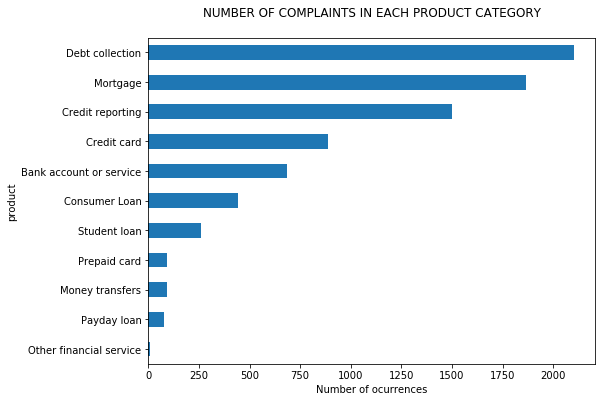

In [12]:
fig = plt.figure(figsize=(8,6))
df.groupby('product')['consumer_complaint_narrative'].count().sort_values().plot.barh(
    ylim=0, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);


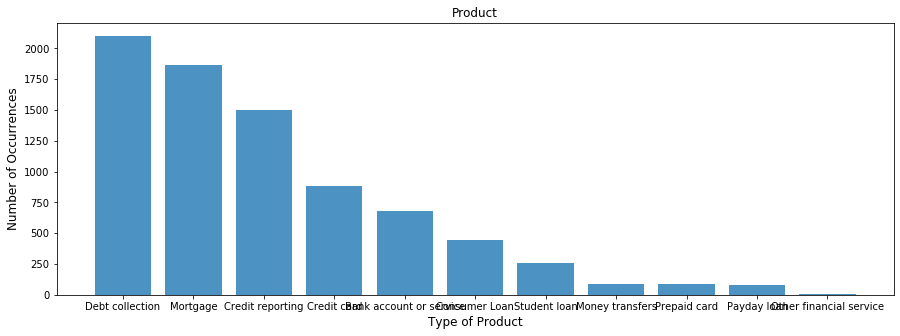

In [13]:
plt.figure(figsize=(15,5))
# plt.bar(real_subject_count.index, real_subject_count.values, alpha=0.8, label='Real')
plt.bar(product_value_counts.index, product_value_counts.values, alpha=0.8, label='Subject')
# plt.bar(subject_count.index, subject_count.values, alpha=0.8, label='Real')
plt.title('Product')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of Product', fontsize=12)
plt.show()

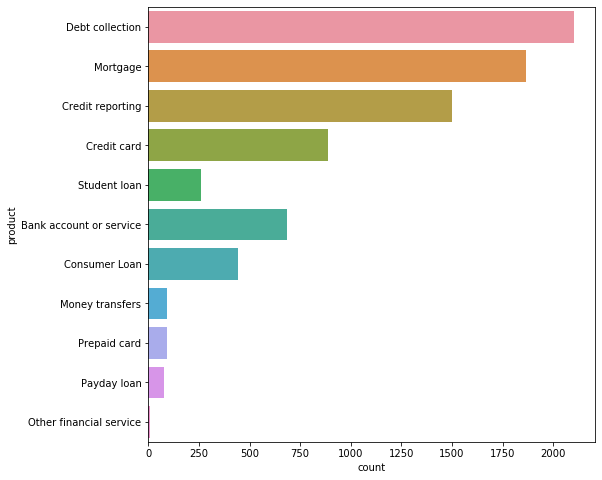

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(y='product', data = df)

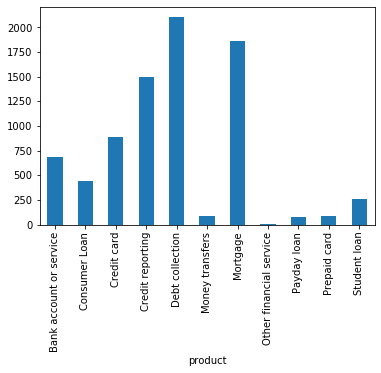

In [15]:
df.groupby(['product'])['consumer_complaint_narrative'].count().plot(kind="bar")
plt.show()


Text(0.5, 1.0, 'Distribution of The Product According to consumer_disputed')

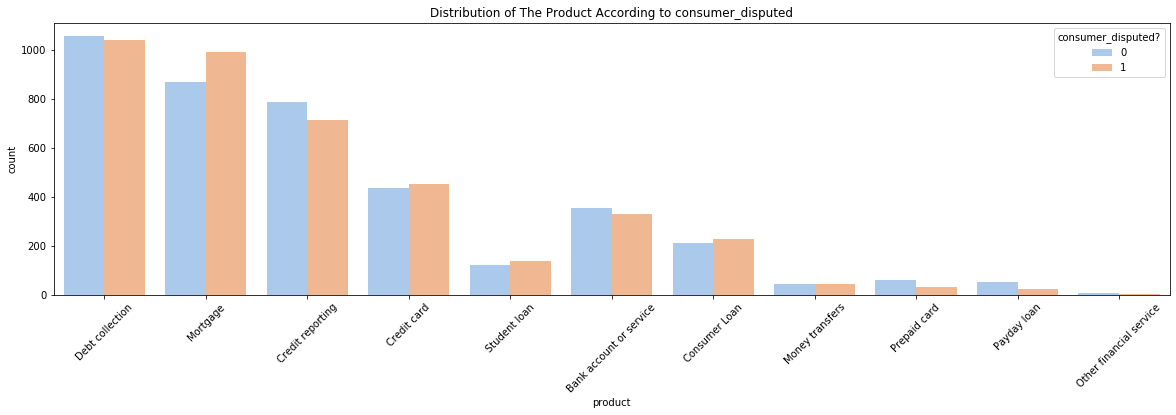

In [16]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x="product",  hue='consumer_disputed?', data=df, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Distribution of The Product According to consumer_disputed")

In [ ]:
# First : Convert to numeric feature 
# sns.pairplot(df)


/home/ali/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


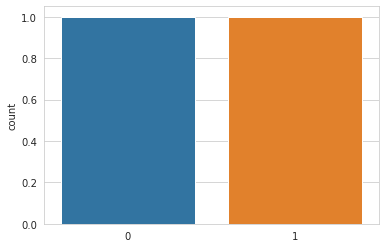

In [18]:
df_value_counts=df['consumer_disputed?'].value_counts()
sns.set_style("whitegrid")
sns.countplot(df_value_counts.index)

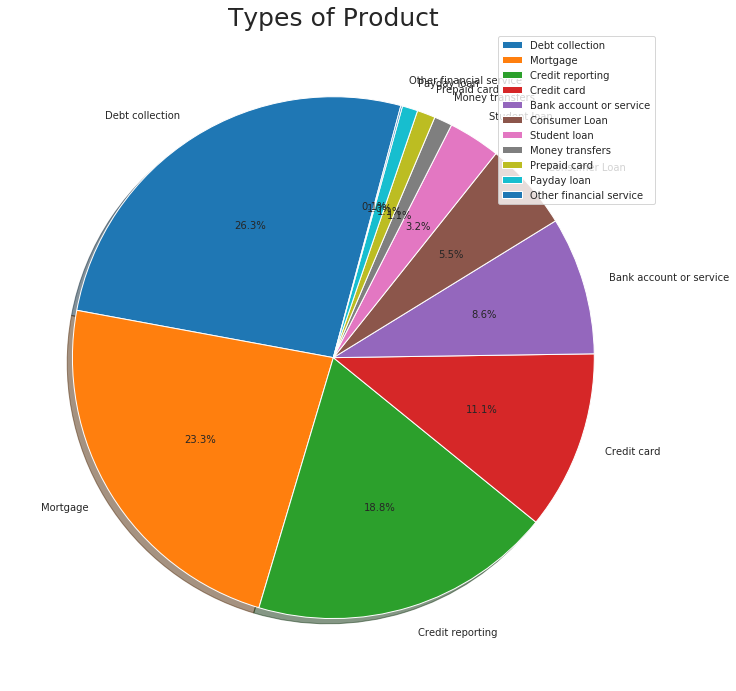

In [19]:
df['product'].value_counts().plot.pie(figsize = (15,12), startangle = 75,autopct = "%.1f%%",shadow=True)
plt.title('Types of Product', fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# TODO

# Doc2Vec 
# https://www.kaggle.com/code/tarunchaubey/news-category-classification-machine-learning


In [20]:
df['product_id'] = df['product'].factorize()[0]
product_id_df = df[['product', 'product_id']].drop_duplicates()

product_to_id = dict(product_id_df.values)
id_to_product = dict(product_id_df[['product_id', 'product']].values)

In [21]:
# df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('Un'))

tfidf = TfidfVectorizer()
tfidf.fit(df['consumer_complaint_narrative'].values)
X = tfidf.transform(df['consumer_complaint_narrative'].values).toarray()

# y=df['consumer_disputed?']

y = df['product']


In [22]:
# I need more information about how works scaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit(X)
data=scaler.transform(X)

In [23]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.25,random_state=2022)

In [ ]:
model_Multinomial = MultinomialNB()
model_Multinomial.fit(X_train, y_train)
y_pred_Multinomial = model_Multinomial.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.43      0.56       174
           1       0.83      0.08      0.15       118
           2       0.69      0.49      0.57       224
           3       0.78      0.78      0.78       371
           4       0.67      0.90      0.77       531
           5       0.00      0.00      0.00        22
           6       0.67      0.94      0.78       464
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        19
          10       1.00      0.07      0.14        55

    accuracy                           0.70      2000
   macro avg       0.50      0.34      0.34      2000
weighted avg       0.70      0.70      0.66      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


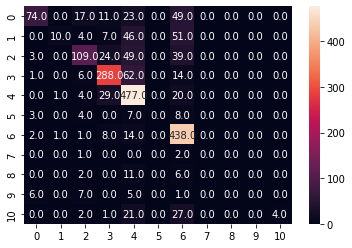

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(classification_report(y_test, y_pred_Multinomial))

confusion_m = confusion_matrix(y_test, y_pred_Multinomial)
sns.heatmap(confusion_m, annot=True,fmt=".1f")


In [ ]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)

y_pred_model_log_reg = model_log_reg.predict(X_test)
# training_data_accuracy = accuracy_score(X_train_prediction, y_train)


              precision    recall  f1-score   support

           0       0.79      0.75      0.77       174
           1       0.82      0.47      0.60       118
           2       0.78      0.71      0.74       224
           3       0.80      0.84      0.82       371
           4       0.77      0.89      0.83       531
           5       0.50      0.18      0.27        22
           6       0.85      0.94      0.89       464
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        19
           9       1.00      0.16      0.27        19
          10       0.75      0.49      0.59        55

    accuracy                           0.80      2000
   macro avg       0.64      0.49      0.52      2000
weighted avg       0.79      0.80      0.78      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


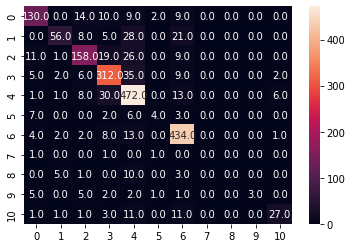

In [ ]:
print(classification_report(y_test, y_pred_model_log_reg))
confusion_log = confusion_matrix(y_test, y_pred_model_log_reg)
sns.heatmap(confusion_log, annot=True,fmt=".1f")

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X_train, y_train)
y_pred_linear_clf = linear_clf.predict(X_test)


              precision    recall  f1-score   support

           0       0.77      0.70      0.73       174
           1       0.72      0.53      0.61       118
           2       0.71      0.66      0.68       224
           3       0.76      0.82      0.79       371
           4       0.80      0.85      0.82       531
           5       0.59      0.45      0.51        22
           6       0.85      0.91      0.88       464
           7       0.00      0.00      0.00         3
           8       0.44      0.21      0.29        19
           9       0.62      0.42      0.50        19
          10       0.72      0.56      0.63        55

    accuracy                           0.78      2000
   macro avg       0.63      0.56      0.59      2000
weighted avg       0.78      0.78      0.78      2000



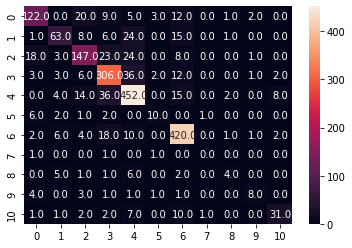

In [ ]:
print(classification_report(y_test, y_pred_linear_clf))
confusion_linear_clf = confusion_matrix(y_test, y_pred_linear_clf)
sns.heatmap(confusion_linear_clf, annot=True,fmt=".1f")

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model_random_forest = RandomForestRegressor() #n_estimators = 1000, random_state = 42
# model_random_forest.fit(X_train, y_train)
# y_pred_random_forest = model_random_forest.predict(X_test)


In [ ]:
# print(classification_report(y_test, y_pred_random_forest))
# confusion_linear_clf = confusion_matrix(y_test, y_pred_random_forest)
# sns.heatmap(model_random_forest, annot=True,fmt=".1f")